# Web Scraping and EDA Project


# requests - This is used to extract the HTML code from the given URL
BeautifulSoup - Format and Scrap the data from the HTML
Steps

Identify URL
Inspect HTML code
Find the HTML tag for the element that you want to extract.
Write some code to scrap this data

In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# Identify the URL

In [2]:
url='https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true'

In [3]:
page=requests.get(url, headers = {'User-Agent':'Mozilla/5.0'})

In [4]:
page

<Response [200]>

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <title>Companies Hiring in India - 59.1k companies | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ssr" property="fb:app_id" content="712617688793459"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" name="msapplication-navbutton-color" content="#ffffff"><meta data-n-head="
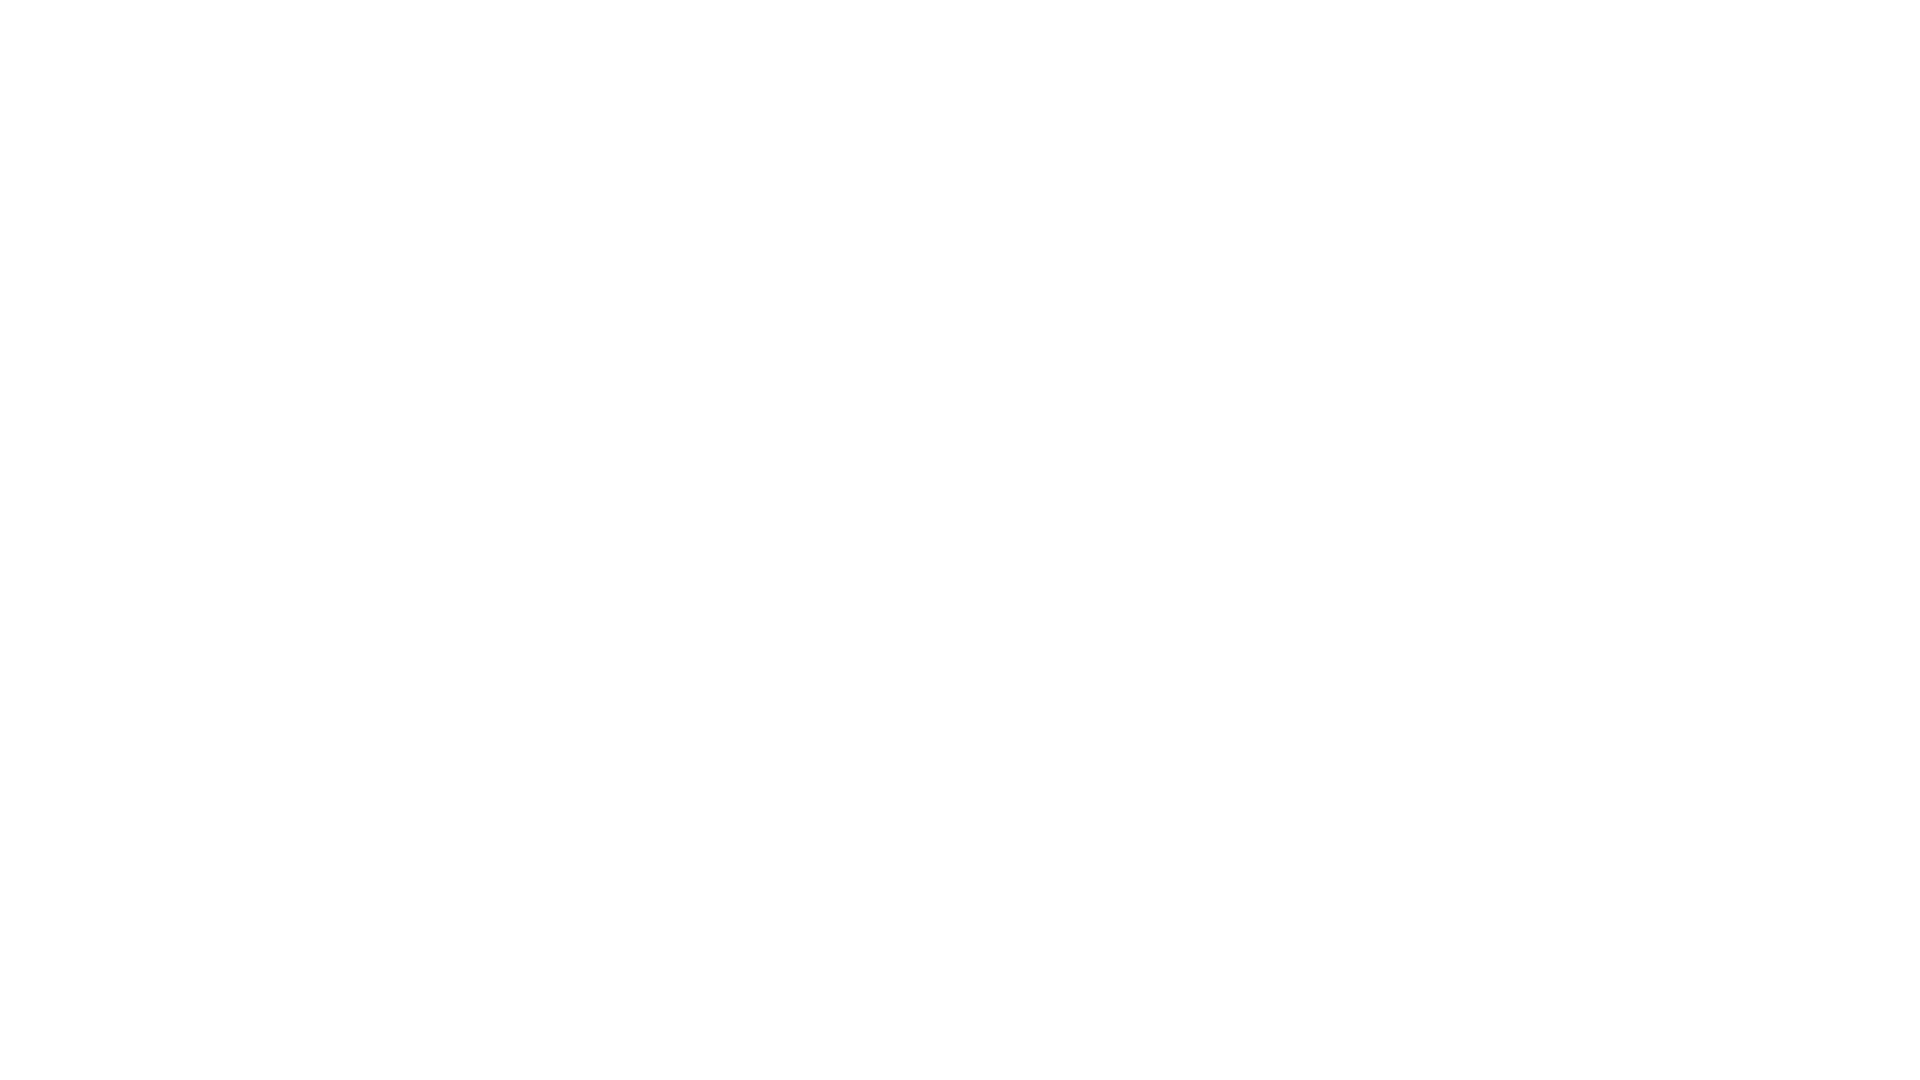

In [5]:
htmlcode=page.text
htmlcode

In [6]:
soup = BeautifulSoup(htmlcode,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Companies Hiring in India - 59.1k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-
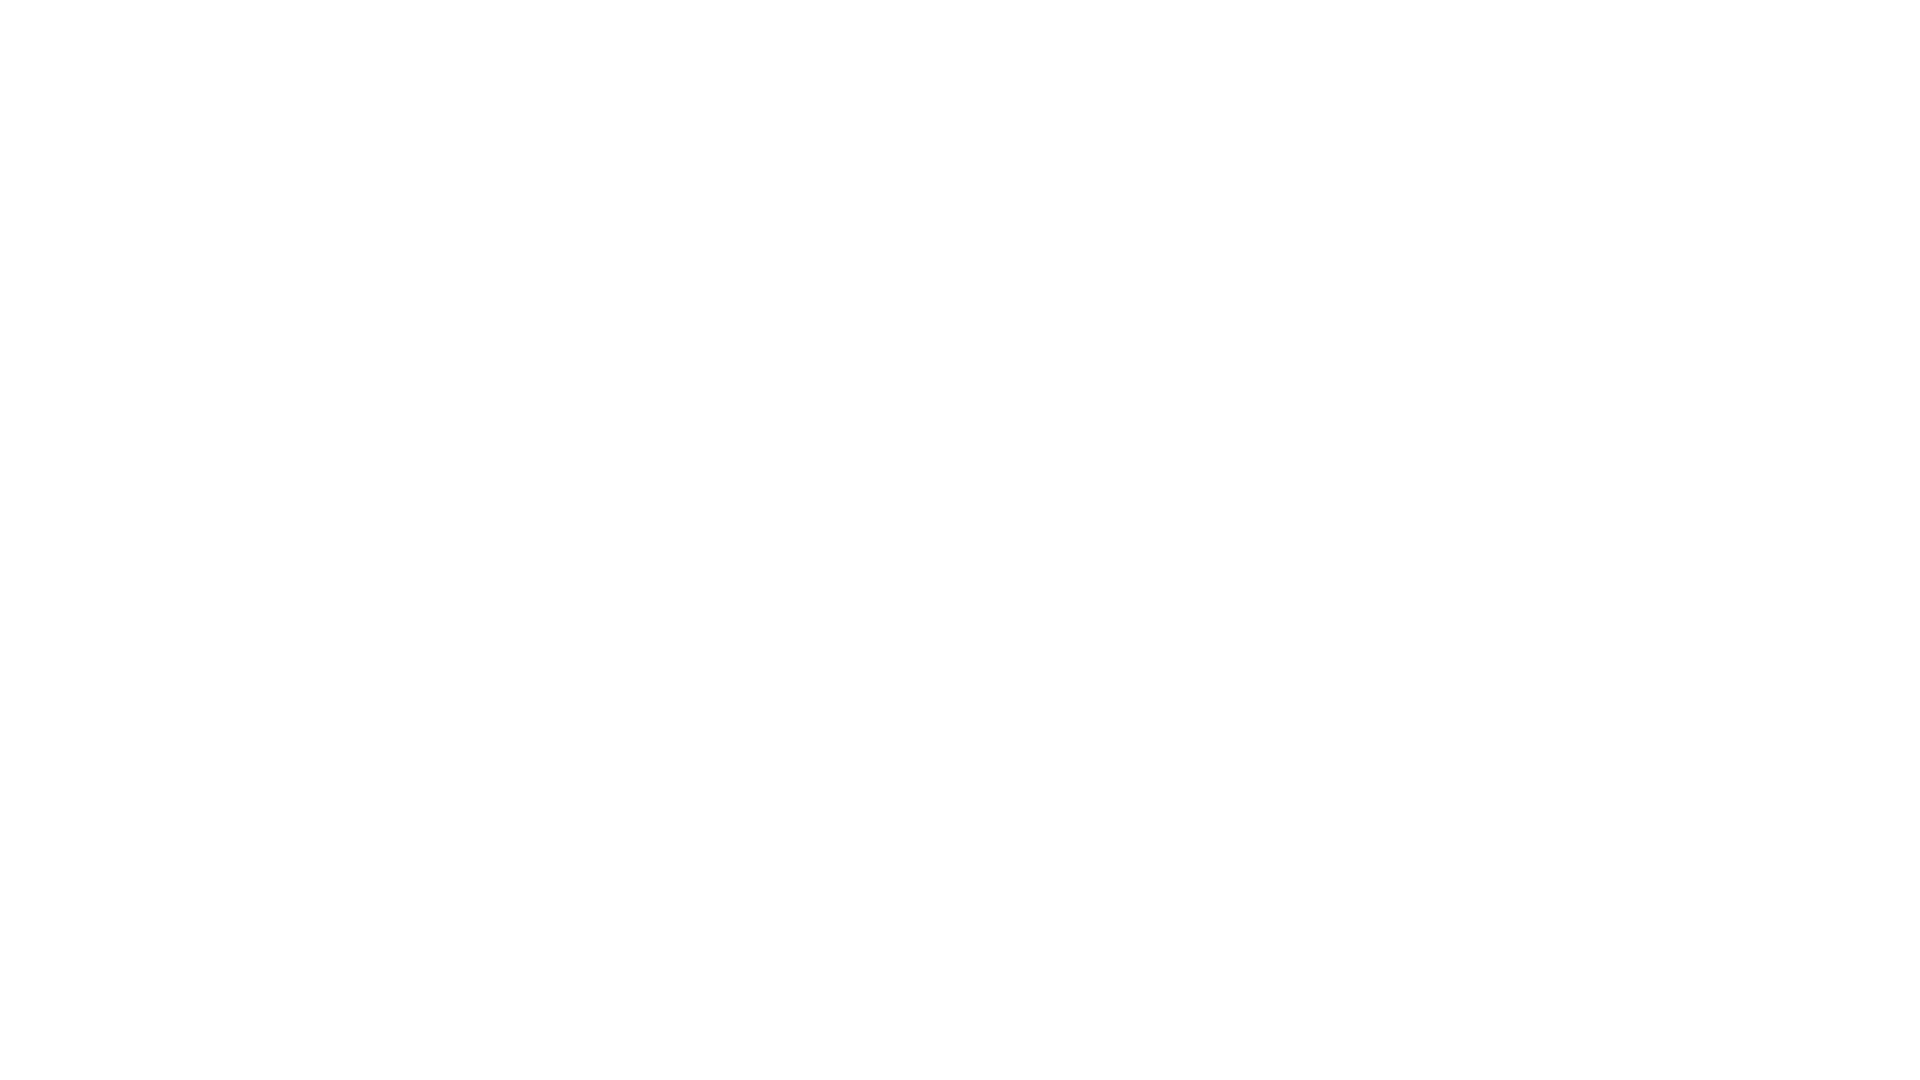

In [7]:
print(soup.prettify())

# Let's look into all the URLs
## Code for Web Scrapping (Correct way)

In [8]:
company=[]
reviews=[]
ratings=[]
salaries=[]
domain=[] #domain
location=[]  #location
age=[]       #age
emp=[]        #employees
for i in range(1,15):
    print('https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page={}'.format(i))
    page=requests.get(url, headers = {'User-Agent':'Mozilla/5.0'})
    htmlcode=page.text
    soup= BeautifulSoup(htmlcode)
    
    companys=soup.find_all('h2',class_='company-name bold-title-l')  
    for a in companys:
        company.append(a.text)
        
    review=soup.find_all('a',attrs={'class':"review-count sbold-Labels"})
    for b in review:
        reviews.append(b.text)
    
    rating = soup.find_all('p', attrs={'class' : "rating"})
    for c in rating:
        ratings.append(c.text)
        
    salary=soup.find_all('ul',attrs={'class':'company-action-center'})
    for f in salary:
        salaries.append(f.text.split()[4]) 
        
    t=soup.find_all('p', class_='infoEntity sbold-list-header')
    for i in range(0, len(t)):
        if (i%4==0):
            domain.append(t[i].text)
        elif (i%4==1):
            location.append(t[i].text)
        elif (i%4==2):
            age.append(t[i].text)
        else:
            emp.append(t[i].text)
    
    
    
    

https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=1
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=2
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=3
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=4
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=5
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=6
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=7
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=8
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=9
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=10
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=true&page=11
https://www.ambitionbox.com/list-of-companies?sort_by=popularity&hiring=tr

# Create a DataFrame and save it in CSV file

In [9]:
c={'Company':company,'Reviews_k':reviews,'Ratings':ratings,'Salaries(in k)':salaries,'Domain':domain,'Location':location,'Age':age,'Emp':emp}
df = pd.DataFrame(c)

In [10]:
df

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Location,Age,Emp
0,\n\t\t\t\t\t\t\t\t\tTCS\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(51.4k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t3.9\n\t\t\t\t\t\t\t\t,339.7k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 271 more\...",\n\t\t\t\t\t\t\t55 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
1,\n\t\t\t\t\t\t\t\t\tAccenture\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(32.8k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t4.1\n\t\t\t\t\t\t\t\t,219.3k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\tDublin + 131 more\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t34 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
2,\n\t\t\t\t\t\t\t\t\tCognizant\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(30.2k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t3.9\n\t\t\t\t\t\t\t\t,199.5k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\tTeaneck. New Jersey. + 101 mor...,\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
3,\n\t\t\t\t\t\t\t\t\tICICI Bank\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(34.1k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t4.0\n\t\t\t\t\t\t\t\t,75.9k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 1059 more...",\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
4,\n\t\t\t\t\t\t\t\t\tHDFC Bank\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(40.1k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t4.0\n\t\t\t\t\t\t\t\t,79.6k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 1269 more...",\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t50k-1 Lakh Employees (India)\n...
...,...,...,...,...,...,...,...,...
415,\n\t\t\t\t\t\t\t\t\tBYJU'S\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(13.4k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t3.5\n\t\t\t\t\t\t\t\t,34.3k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tBangalore,Karnataka + 259 more...",\n\t\t\t\t\t\t\t12 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1k-5k Employees (India)\n\t\t\...
416,\n\t\t\t\t\t\t\t\t\tTata Motors\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(12k Reviews)\n\t\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t4.1\n\t\t\t\t\t\t\t\t,32k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tPune,Maharashtra + 388 more\n\...",\n\t\t\t\t\t\t\t78 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...
417,\n\t\t\t\t\t\t\t\t\tFlipkart\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(11.8k Reviews)\n\t\t\t\t\...,\n\t\t\t\t\t\t\t\t\t4.2\n\t\t\t\t\t\t\t\t,30.8k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tBangalore,Karnataka + 452 more...",\n\t\t\t\t\t\t\t16 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...
418,\n\t\t\t\t\t\t\t\t\tWNS\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(7.1k Reviews)\n\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t3.7\n\t\t\t\t\t\t\t\t,27.4k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 24 more\n...",\n\t\t\t\t\t\t\t27 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...


## RAW data

In [11]:
df.to_csv("listofcompanies.csv")

In [12]:
pwd

'C:\\Users\\nehasulthana\\Downloads'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

In [14]:
ambi=pd.read_csv('C:\\Users\\nehasulthana\\Downloads\listofcompanies.csv')


In [15]:
print(len(ambi['Company']))
print(len(ambi['Reviews_k']))
print(len(ambi['Ratings']))
print(len(ambi['Salaries(in k)']))
print(len(ambi['Domain']))  
print(len(ambi['Location']))
print(len(ambi['Age']))      
print(len(ambi['Emp']))


420
420
420
420
420
420
420
420


In [16]:
ambi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      420 non-null    int64  
 1   Company         420 non-null    object 
 2   Reviews_k       420 non-null    object 
 3   Ratings         420 non-null    float64
 4   Salaries(in k)  420 non-null    object 
 5   Domain          420 non-null    object 
 6   Location        420 non-null    object 
 7   Age             420 non-null    object 
 8   Emp             420 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.7+ KB


In [17]:
ambi

,Unnamed: 0,Company,Reviews_k,Ratings,Salaries(in k),Domain,Location,Age,Emp
0,0,\n\t\t\t\t\t\t\t\t\tTCS\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(51.4k Reviews)\n\t\t\t\t\...,3.9,339.7k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 271 more\...",\n\t\t\t\t\t\t\t55 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
1,1,\n\t\t\t\t\t\t\t\t\tAccenture\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(32.8k Reviews)\n\t\t\t\t\...,4.1,219.3k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\tDublin + 131 more\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t34 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
2,2,\n\t\t\t\t\t\t\t\t\tCognizant\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(30.2k Reviews)\n\t\t\t\t\...,3.9,199.5k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\tTeaneck. New Jersey. + 101 mor...,\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
3,3,\n\t\t\t\t\t\t\t\t\tICICI Bank\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(34.1k Reviews)\n\t\t\t\t\...,4.0,75.9k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 1059 more...",\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1 Lakh+ Employees (India)\n\t\...
4,4,\n\t\t\t\t\t\t\t\t\tHDFC Bank\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(40.1k Reviews)\n\t\t\t\t\...,4.0,79.6k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 1269 more...",\n\t\t\t\t\t\t\t29 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t50k-1 Lakh Employees (India)\n...
...,...,...,...,...,...,...,...,...,...
415,415,\n\t\t\t\t\t\t\t\t\tBYJU'S\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(13.4k Reviews)\n\t\t\t\t\...,3.5,34.3k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tBangalore,Karnataka + 259 more...",\n\t\t\t\t\t\t\t12 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t1k-5k Employees (India)\n\t\t\...
416,416,\n\t\t\t\t\t\t\t\t\tTata Motors\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(12k Reviews)\n\t\t\t\t\t\...,4.1,32k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tPune,Maharashtra + 388 more\n\...",\n\t\t\t\t\t\t\t78 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...
417,417,\n\t\t\t\t\t\t\t\t\tFlipkart\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(11.8k Reviews)\n\t\t\t\t\...,4.2,30.8k,\n\t\t\t\t\t\t\tPublic\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tBangalore,Karnataka + 452 more...",\n\t\t\t\t\t\t\t16 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...
418,418,\n\t\t\t\t\t\t\t\t\tWNS\n\t\t\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t(7.1k Reviews)\n\t\t\t\t\t...,3.7,27.4k,\n\t\t\t\t\t\t\tPrivate\n\t\t\t\t\t\t,"\n\t\t\t\t\t\t\tMumbai,Maharashtra + 24 more\n...",\n\t\t\t\t\t\t\t27 years old\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t10k-50k Employees (India)\n\t\...


##  Data Cleaning:

# Extracting the Details using Regular expression

In [18]:
regex=r't(.*)?\n'
ambi['Company']=ambi['Company'].str.replace('\t','').replace('\n',' ')


In [19]:
ambi['Company']=ambi['Company'].str.replace('\n','')


In [20]:
ambi['Company']=ambi['Company'].str.replace('\n','')


In [21]:
ambi['Ratings']=ambi['Ratings'].replace('\n',' ')

In [22]:
ambi['Domain']=ambi['Domain'].str.replace('\t',' ')

In [23]:
ambi['Domain']=ambi['Domain'].str.replace('\n',' ')


In [24]:
ambi['Salaries(in k)']=ambi['Salaries(in k)'].str.replace('k','')

In [25]:
ambi['Location']=ambi['Location'].str.replace('\t',' ')

In [26]:
ambi['Location']=ambi['Location'].str.replace('\n',' ')

In [27]:
ambi['Age']=ambi['Age'].str.replace('\t',' ')

In [28]:
ambi['Age']=ambi['Age'].str.replace('\n',' ')

In [29]:
ambi['Age']=ambi['Age'].str.replace('years old',' ')

In [30]:
ambi['Emp']=ambi['Emp'].str.replace('\n',' ')

In [31]:
ambi['Emp']=ambi['Emp'].str.replace('\t',' ')

In [32]:
ambi['Reviews_k']=ambi['Reviews_k'].str.replace('\n',' ')

In [33]:
ambi['Reviews_k']=ambi['Reviews_k'].str.replace('Reviews',' ')

In [34]:
regex=r'\((.*)\)'

In [35]:
ambi['Reviews_k']=ambi['Reviews_k'].apply(lambda x: re.findall(regex,x))

In [36]:
ambi.Reviews_k=ambi.Reviews_k.apply(lambda x:' '.join(x))

In [37]:
#ambi["Reviews"] = ambi["Reviews"].replace("k", "",regex=True).astype(float)*1000
#ambi["Reviews"] = ambi["Reviews"].astype(int)

In [38]:
ambi['Reviews_k']=ambi['Reviews_k'].str.replace('k','')

In [39]:
ambi['Location'] = ambi['Location'].apply(lambda x: re.sub(r"\s\+\s\d+\smore","", x))


### Dropping unwanted columns

In [40]:
ambi.drop(columns=['Unnamed: 0'],axis=1,inplace=True)


In [41]:
ambi['Emp'] = ambi['Emp'].apply(lambda x: re.sub(r"\s\+\s\d+\smore","", x))


In [42]:
ambi['Emp'] = ambi['Emp'].apply(lambda x: re.sub(r"Employees \(India\)", "", x))


In [43]:
ambi['Emp'] = ambi['Emp'].apply(lambda x: re.sub(r"\+", "", x))


In [44]:
ambi.drop(['Emp'], axis=1)


,Company,Reviews_k,Ratings,Salaries(in k),Domain,Location,Age
0,TCS,51.4,3.9,339.7,Public,"Mumbai,Maharashtra",55
1,Accenture,32.8,4.1,219.3,Public,Dublin,34
2,Cognizant,30.2,3.9,199.5,Private,Teaneck. New Jersey.,29
3,ICICI Bank,34.1,4.0,75.9,Public,"Mumbai,Maharashtra",29
4,HDFC Bank,40.1,4.0,79.6,Public,"Mumbai,Maharashtra",29
...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,"Bangalore,Karnataka",12
416,Tata Motors,12,4.1,32,Public,"Pune,Maharashtra",78
417,Flipkart,11.8,4.2,30.8,Public,"Bangalore,Karnataka",16
418,WNS,7.1,3.7,27.4,Private,"Mumbai,Maharashtra",27


In [45]:
a=ambi.Emp.str.split("-")
employee_size=[]
for i in a:
    employee_size.append(i[-1].strip())


In [46]:
ambi['Employee_size']=employee_size

In [47]:
ambi

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Location,Age,Emp,Employee_size
0,TCS,51.4,3.9,339.7,Public,"Mumbai,Maharashtra",55,1 Lakh,1 Lakh
1,Accenture,32.8,4.1,219.3,Public,Dublin,34,1 Lakh,1 Lakh
2,Cognizant,30.2,3.9,199.5,Private,Teaneck. New Jersey.,29,1 Lakh,1 Lakh
3,ICICI Bank,34.1,4.0,75.9,Public,"Mumbai,Maharashtra",29,1 Lakh,1 Lakh
4,HDFC Bank,40.1,4.0,79.6,Public,"Mumbai,Maharashtra",29,50k-1 Lakh,1 Lakh
...,...,...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,"Bangalore,Karnataka",12,1k-5k,5k
416,Tata Motors,12,4.1,32,Public,"Pune,Maharashtra",78,10k-50k,50k
417,Flipkart,11.8,4.2,30.8,Public,"Bangalore,Karnataka",16,10k-50k,50k
418,WNS,7.1,3.7,27.4,Private,"Mumbai,Maharashtra",27,10k-50k,50k


In [48]:
ambi.drop('Emp',axis = 1, inplace = True)

In [49]:
ambi

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Location,Age,Employee_size
0,TCS,51.4,3.9,339.7,Public,"Mumbai,Maharashtra",55,1 Lakh
1,Accenture,32.8,4.1,219.3,Public,Dublin,34,1 Lakh
2,Cognizant,30.2,3.9,199.5,Private,Teaneck. New Jersey.,29,1 Lakh
3,ICICI Bank,34.1,4.0,75.9,Public,"Mumbai,Maharashtra",29,1 Lakh
4,HDFC Bank,40.1,4.0,79.6,Public,"Mumbai,Maharashtra",29,1 Lakh
...,...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,"Bangalore,Karnataka",12,5k
416,Tata Motors,12,4.1,32,Public,"Pune,Maharashtra",78,50k
417,Flipkart,11.8,4.2,30.8,Public,"Bangalore,Karnataka",16,50k
418,WNS,7.1,3.7,27.4,Private,"Mumbai,Maharashtra",27,50k


In [50]:
ambi["Employee_size"] = ambi["Employee_size"].apply(lambda x: int(x.replace("Lakh", ""))*100000 if "Lakh" in x else(int(x.replace('k',''))*1000 if 'k' in x else x))


In [51]:
ambi[['City','State']]=ambi['Location'].str.split(',',expand=True)

In [52]:
ambi.isna().sum()

Company            0
Reviews_k          0
Ratings            0
Salaries(in k)     0
Domain             0
Location           0
Age                0
Employee_size      0
City               0
State             56
dtype: int64

In [53]:
ambi.drop('Location',axis = 1, inplace = True)

## we are reset_indexing

In [54]:
ambi.reset_index(inplace=True, drop=True)


In [55]:
ambi.isna().sum()

Company            0
Reviews_k          0
Ratings            0
Salaries(in k)     0
Domain             0
Age                0
Employee_size      0
City               0
State             56
dtype: int64

##### state has 70 null values

In [56]:
ambi

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Age,Employee_size,City,State
0,TCS,51.4,3.9,339.7,Public,55,100000,Mumbai,Maharashtra
1,Accenture,32.8,4.1,219.3,Public,34,100000,Dublin,None
2,Cognizant,30.2,3.9,199.5,Private,29,100000,Teaneck. New Jersey.,None
3,ICICI Bank,34.1,4.0,75.9,Public,29,100000,Mumbai,Maharashtra
4,HDFC Bank,40.1,4.0,79.6,Public,29,100000,Mumbai,Maharashtra
...,...,...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,12,5000,Bangalore,Karnataka
416,Tata Motors,12,4.1,32,Public,78,50000,Pune,Maharashtra
417,Flipkart,11.8,4.2,30.8,Public,16,50000,Bangalore,Karnataka
418,WNS,7.1,3.7,27.4,Private,27,50000,Mumbai,Maharashtra


In [57]:
ambi['State'] = ambi['State'].replace({None: 'unknown'})


### replacing null values with unknown

In [58]:
ambi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         420 non-null    object 
 1   Reviews_k       420 non-null    object 
 2   Ratings         420 non-null    float64
 3   Salaries(in k)  420 non-null    object 
 4   Domain          420 non-null    object 
 5   Age             420 non-null    object 
 6   Employee_size   420 non-null    int64  
 7   City            420 non-null    object 
 8   State           420 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.7+ KB


In [59]:
ambi.isna().sum()

Company           0
Reviews_k         0
Ratings           0
Salaries(in k)    0
Domain            0
Age               0
Employee_size     0
City              0
State             0
dtype: int64

In [60]:
ambi

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Age,Employee_size,City,State
0,TCS,51.4,3.9,339.7,Public,55,100000,Mumbai,Maharashtra
1,Accenture,32.8,4.1,219.3,Public,34,100000,Dublin,unknown
2,Cognizant,30.2,3.9,199.5,Private,29,100000,Teaneck. New Jersey.,unknown
3,ICICI Bank,34.1,4.0,75.9,Public,29,100000,Mumbai,Maharashtra
4,HDFC Bank,40.1,4.0,79.6,Public,29,100000,Mumbai,Maharashtra
...,...,...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,12,5000,Bangalore,Karnataka
416,Tata Motors,12,4.1,32,Public,78,50000,Pune,Maharashtra
417,Flipkart,11.8,4.2,30.8,Public,16,50000,Bangalore,Karnataka
418,WNS,7.1,3.7,27.4,Private,27,50000,Mumbai,Maharashtra


In [61]:
ambi.columns

Index(['Company', 'Reviews_k', 'Ratings', 'Salaries(in k)', 'Domain', 'Age',
       'Employee_size', 'City', 'State'],
      dtype='object')

In [62]:
ambi

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Age,Employee_size,City,State
0,TCS,51.4,3.9,339.7,Public,55,100000,Mumbai,Maharashtra
1,Accenture,32.8,4.1,219.3,Public,34,100000,Dublin,unknown
2,Cognizant,30.2,3.9,199.5,Private,29,100000,Teaneck. New Jersey.,unknown
3,ICICI Bank,34.1,4.0,75.9,Public,29,100000,Mumbai,Maharashtra
4,HDFC Bank,40.1,4.0,79.6,Public,29,100000,Mumbai,Maharashtra
...,...,...,...,...,...,...,...,...,...
415,BYJU'S,13.4,3.5,34.3,Private,12,5000,Bangalore,Karnataka
416,Tata Motors,12,4.1,32,Public,78,50000,Pune,Maharashtra
417,Flipkart,11.8,4.2,30.8,Public,16,50000,Bangalore,Karnataka
418,WNS,7.1,3.7,27.4,Private,27,50000,Mumbai,Maharashtra


In [63]:
ambi.shape

(420, 9)

In [64]:
ambi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         420 non-null    object 
 1   Reviews_k       420 non-null    object 
 2   Ratings         420 non-null    float64
 3   Salaries(in k)  420 non-null    object 
 4   Domain          420 non-null    object 
 5   Age             420 non-null    object 
 6   Employee_size   420 non-null    int64  
 7   City            420 non-null    object 
 8   State           420 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.7+ KB


### type casting

In [65]:
ambi['Reviews_k']=ambi['Reviews_k'].astype('float')
ambi['Salaries(in k)']=ambi['Salaries(in k)'].astype('float')
ambi['Age']=ambi['Age'].astype('int')
                            


In [66]:
ambi.describe()

,Reviews_k,Ratings,Salaries(in k),Age,Employee_size
count,420.000000,420.000000,420.000000,420.000000,420.000000
mean,22.126667,3.970000,86.133333,44.033333,80166.666667
std,11.078365,0.179378,70.846619,34.643274,27250.203447
min,7.100000,3.500000,27.400000,5.000000,5000.000000
25%,13.600000,3.900000,38.600000,26.000000,50000.000000
50%,18.850000,4.000000,54.900000,31.000000,100000.000000
75%,29.400000,4.100000,110.000000,55.000000,100000.000000
max,51.400000,4.300000,339.700000,178.000000,100000.000000


In [67]:
ambi.isna().sum()

Company           0
Reviews_k         0
Ratings           0
Salaries(in k)    0
Domain            0
Age               0
Employee_size     0
City              0
State             0
dtype: int64

In [68]:
ambi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         420 non-null    object 
 1   Reviews_k       420 non-null    float64
 2   Ratings         420 non-null    float64
 3   Salaries(in k)  420 non-null    float64
 4   Domain          420 non-null    object 
 5   Age             420 non-null    int32  
 6   Employee_size   420 non-null    int64  
 7   City            420 non-null    object 
 8   State           420 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 28.0+ KB


# DATA VISUALIZATION

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
ambi.head()

,Company,Reviews_k,Ratings,Salaries(in k),Domain,Age,Employee_size,City,State
0,TCS,51.4,3.9,339.7,Public,55,100000,Mumbai,Maharashtra
1,Accenture,32.8,4.1,219.3,Public,34,100000,Dublin,unknown
2,Cognizant,30.2,3.9,199.5,Private,29,100000,Teaneck. New Jersey.,unknown
3,ICICI Bank,34.1,4.0,75.9,Public,29,100000,Mumbai,Maharashtra
4,HDFC Bank,40.1,4.0,79.6,Public,29,100000,Mumbai,Maharashtra


# Univariate Analysis:

## Univariate analysis explores each variable in a data set, separately
### 1) Categorical
### 2) Numerical

##### 1.Which location has seen a higher growth rate in  companies?

<Figure size 720x720 with 0 Axes>

<AxesSubplot: xlabel='City', ylabel='count'>

Text(0.5, 1.0, 'Number of companies located in cities')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '        Mumbai'),
  Text(1, 0, '        Dublin       '),
  Text(2, 0, '        Teaneck. New Jersey.       '),
  Text(3, 0, '        Bangalore/Bengaluru'),
  Text(4, 0, '        Bengaluru/Bangalore'),
  Text(5, 0, '        Paris       '),
  Text(6, 0, '        Pune'),
  Text(7, 0, '        New York'),
  Text(8, 0, '        Noida'),
  Text(9, 0, '        Seattle'),
  Text(10, 0, '        Fremont'),
  Text(11, 0, '        Armonk'),
  Text(12, 0, '        Navi Mumbai'),
  Text(13, 0, '        Ahmedabad'),
  Text(14, 0, '        Gandhinagar'),
  Text(15, 0, '        Gurgaon/Gurugram'),
  Text(16, 0, '        Bangalore')])

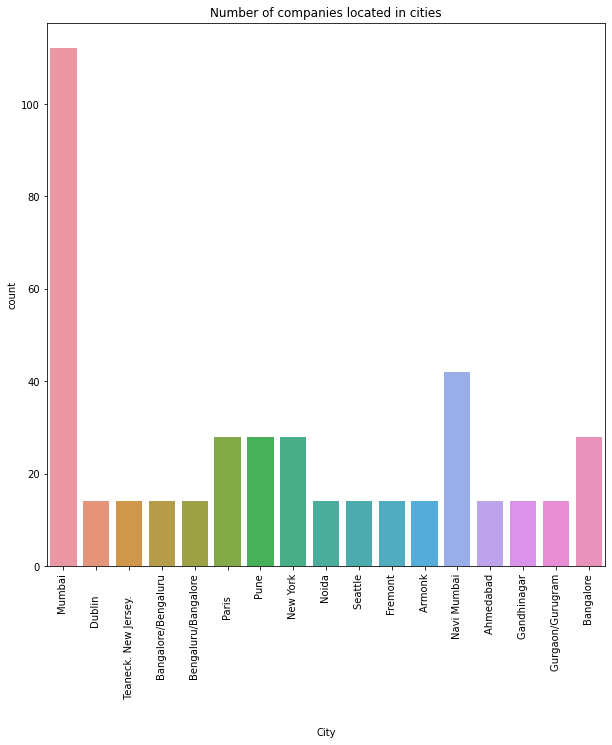

In [71]:
plt.figure(figsize=(10,10))
sns.countplot(x='City', data=ambi)
plt.title("Number of companies located in cities")
plt.xticks(rotation=90)
plt.show()


### 2.What is the percentage of sectors that are actively hiring in India?

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x15fccee9c10>,
 [Text(-0.7360437078139777, -0.8174592712713289, 'PUBLIC'),
  Text(0.7360437460820067, 0.8174592368146356, 'PRIVATE')],
 [Text(-0.4014783860803514, -0.44588687523890663, '77%'),
  Text(0.4014784069538218, 0.44588685644434667, '23%')])

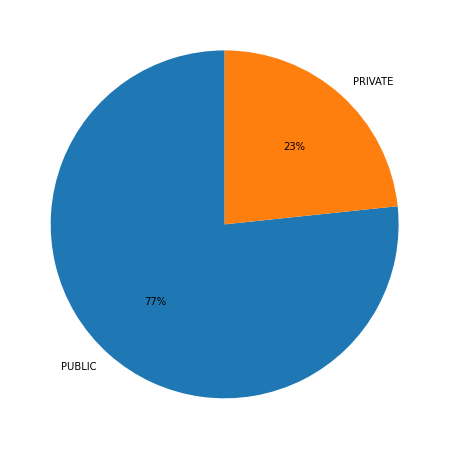

In [72]:
plt.figure(figsize=(8,8))
plt.pie(ambi['Domain'].value_counts(),startangle=90,autopct='%.0f%%',
       labels=['PUBLIC','PRIVATE'])
plt.show()


## 3. Ratings of all companies  actively hiring  in india?

<AxesSubplot: xlabel='Ratings', ylabel='Count'>

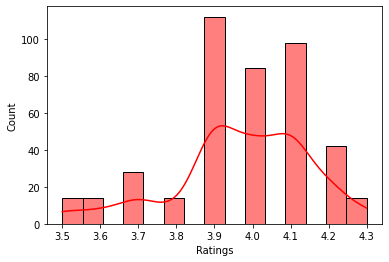

In [73]:
sns.histplot(ambi.Ratings,kde=True,color='red')



## 4. What is the most common age range for established companies hiring in india

Text(0.5, 1.0, 'AGE OF THE COMPANIES')

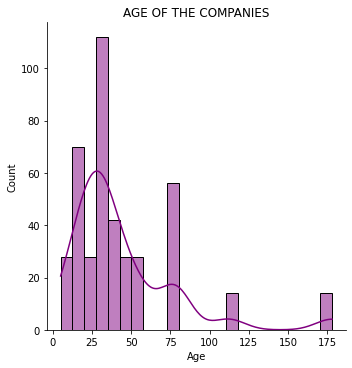

In [74]:
sns.displot(ambi["Age"],kde=True,color='purple')
plt.title('AGE OF THE COMPANIES')
plt.show()

####we can observe that most of the companies  are establish in between 25 to 50 years old

# Bivariate Anaylsis:
##Bivariate analysis is a kind of statistical analysis in which two variables are  observed against each other.!


### 1) Categorical & Numerical
### 2) Categorical & Numerical
### 3) Numerical & Numerical

### 1. Which company has the most highly rated reviews for its  actively hiring process in India?

## cate-num

<Figure size 720x288 with 0 Axes>

<AxesSubplot: xlabel='Company', ylabel='Reviews_k'>

Text(0.5, 1.0, 'REVIEWS BY COMPANY')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'TCS'),
  Text(1, 0, 'Accenture'),
  Text(2, 0, 'Cognizant'),
  Text(3, 0, 'ICICI Bank'),
  Text(4, 0, 'HDFC Bank'),
  Text(5, 0, 'Wipro'),
  Text(6, 0, 'Infosys'),
  Text(7, 0, 'Capgemini'),
  Text(8, 0, 'Tech Mahindra'),
  Text(9, 0, 'Genpact'),
  Text(10, 0, 'HCLTech'),
  Text(11, 0, 'Amazon'),
  Text(12, 0, 'Axis Bank'),
  Text(13, 0, 'Concentrix Corpo...'),
  Text(14, 0, 'IBM'),
  Text(15, 0, 'Reliance jio'),
  Text(16, 0, 'Larsen & Toubro ...'),
  Text(17, 0, 'HDB Financial Se...'),
  Text(18, 0, 'Vodafone Idea'),
  Text(19, 0, 'Teleperformance'),
  Text(20, 0, 'Reliance Retail'),
  Text(21, 0, 'Kotak Mahindra B...'),
  Text(22, 0, 'Deloitte'),
  Text(23, 0, 'Reliance Industr...'),
  Text(24, 0, 'Bharti Airtel'),
  Text(25, 0, "BYJU'S"),
  Text(26, 0, 'Tata Motors'),
  Text(27, 0, 'Flipkart'),
  Text(28, 0, 'WNS'),
  Text(29, 0, 'M

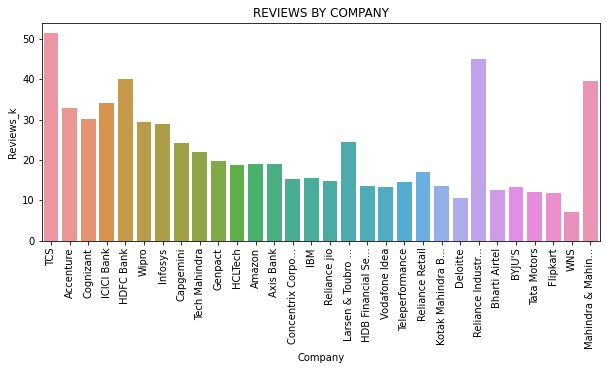

In [75]:
plt.figure(figsize=(10,4))
sns.barplot(x='Company',y='Reviews_k',data=ambi)
plt.title("REVIEWS BY COMPANY")
plt.xticks(rotation=90)
plt.show()

## categorical-Numerical

### 2. which company most  highly rated among all companies hiring process in india?

<Figure size 1080x360 with 0 Axes>

<AxesSubplot: xlabel='Company', ylabel='Ratings'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'TCS'),
  Text(1, 0, 'Accenture'),
  Text(2, 0, 'Cognizant'),
  Text(3, 0, 'ICICI Bank'),
  Text(4, 0, 'HDFC Bank'),
  Text(5, 0, 'Wipro'),
  Text(6, 0, 'Infosys'),
  Text(7, 0, 'Capgemini'),
  Text(8, 0, 'Tech Mahindra'),
  Text(9, 0, 'Genpact'),
  Text(10, 0, 'HCLTech'),
  Text(11, 0, 'Amazon'),
  Text(12, 0, 'Axis Bank'),
  Text(13, 0, 'Concentrix Corpo...'),
  Text(14, 0, 'IBM'),
  Text(15, 0, 'Reliance jio'),
  Text(16, 0, 'Larsen & Toubro ...'),
  Text(17, 0, 'HDB Financial Se...'),
  Text(18, 0, 'Vodafone Idea'),
  Text(19, 0, 'Teleperformance'),
  Text(20, 0, 'Reliance Retail'),
  Text(21, 0, 'Kotak Mahindra B...'),
  Text(22, 0, 'Deloitte'),
  Text(23, 0, 'Reliance Industr...'),
  Text(24, 0, 'Bharti Airtel'),
  Text(25, 0, "BYJU'S"),
  Text(26, 0, 'Tata Motors'),
  Text(27, 0, 'Flipkart'),
  Text(28, 0, 'WNS'),
  Text(29, 0, 'M

Text(0.5, 1.0, 'Company and Ratings')

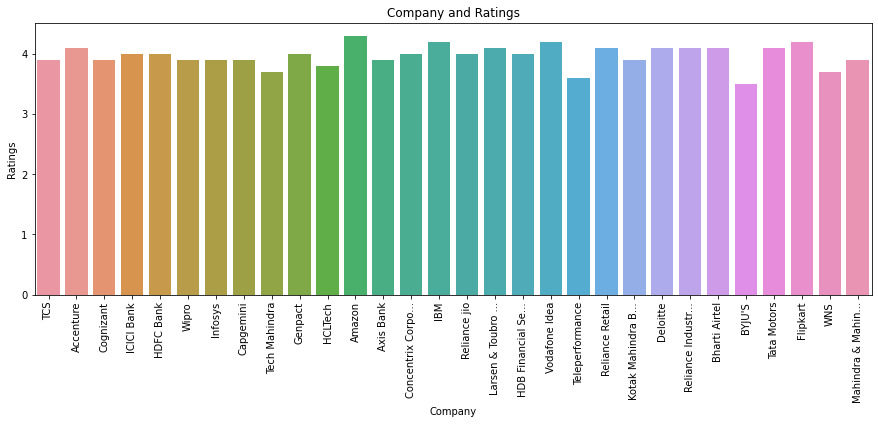

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(x=ambi['Company'],y=ambi['Ratings'],data=ambi)
plt.xticks(rotation = 90)
plt.title('Company and Ratings')
plt.show()

#####amazon is most highly rated among all companies  actively hiring process in india

# NUM-NUM

### 3. Relationship between salaries(in k) vs Reviews_k

<AxesSubplot: xlabel='Salaries(in k)', ylabel='Reviews_k'>

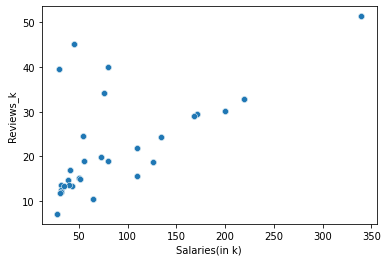

In [77]:
sns.scatterplot(data=ambi,y='Reviews_k',x='Salaries(in k)')

####AS SALARY INCREASES , AUTOMATICALLY REVIEWS WILL INCREASE

### 4. DOES THE AGE OF THE COMPANY RELATE EMPLOYEE SIZE ?

<AxesSubplot: xlabel='Employee_size', ylabel='Age'>

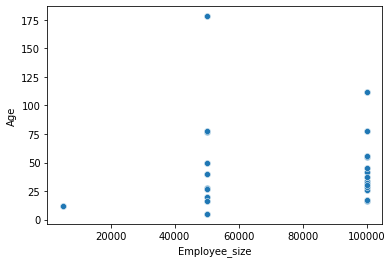

In [78]:
sns.scatterplot(data=ambi,y='Age',x='Employee_size')

####as age of the company increases automatically growth will increase as well as Employee size will increase

### NUM-CAT

#### 5. What are the high-salary sectors in India with active hiring by companies?

<AxesSubplot: xlabel='Domain', ylabel='Salaries(in k)'>

(array([0, 1]),
 [Text(0, 0, '        Public       '), Text(1, 0, '        Private       ')])

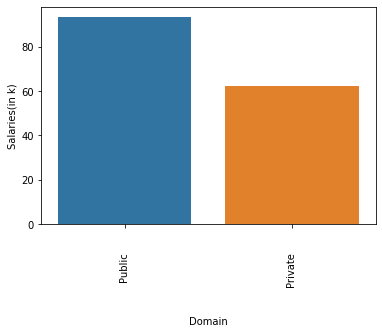

In [79]:
sns.barplot(data=ambi,x='Domain',y='Salaries(in k)',ci=None)
plt.xticks(rotation=90)
plt.show()

###PUBLIC SECTOR HAS HIGH SALARIES THAN PRIVATE SECTOR

# Multi-variate  Analysis:
### Multi-variate analysis is a kind of statistical analysis in which more than two variables are observed against each other.

#### ONE CATEGORICAL AND TWO NUMERICAL

#### In all these categories we can go scatterplot, pairplot ,heatmap etc


<AxesSubplot: xlabel='Age', ylabel='Employee_size'>

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

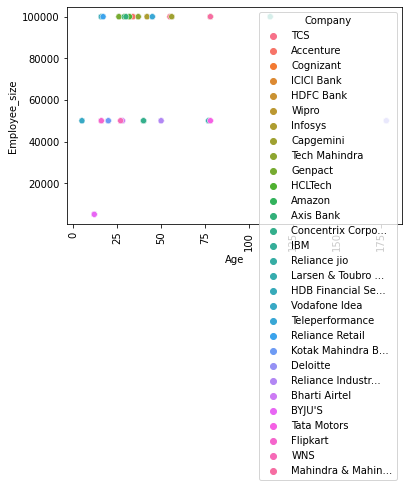

In [80]:
sns.scatterplot(data=ambi,x="Age",y='Employee_size',hue='Company')
plt.xticks(rotation=90)
plt.show()

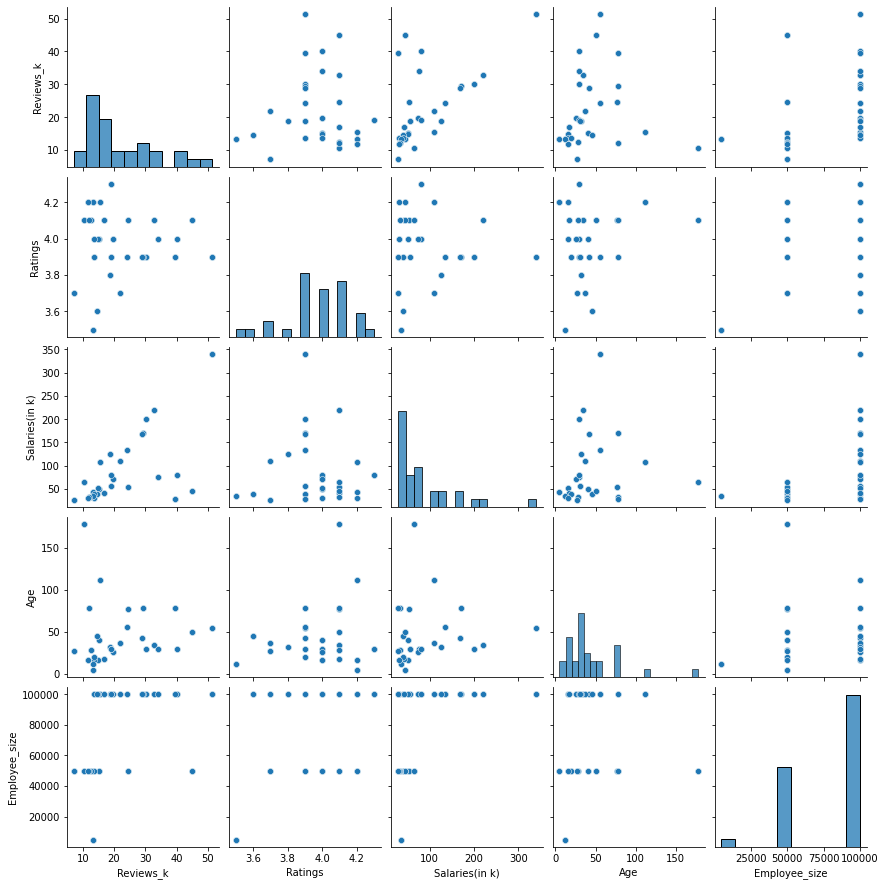

In [81]:
sns.pairplot(ambi)
plt.show()

### HEAT MAP

In [82]:
corr_max = ambi.corr()

<AxesSubplot: >

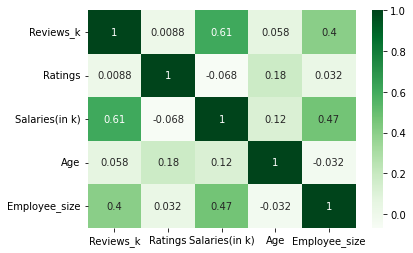

In [83]:
sns.heatmap(corr_max, cmap='Greens', annot=True)
